<a href="https://colab.research.google.com/github/simokamaa/-android-app/blob/color/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install nbconvert


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended


Mean Squared Error: 49179.53422115317
R-squared: 0.8286019504028523


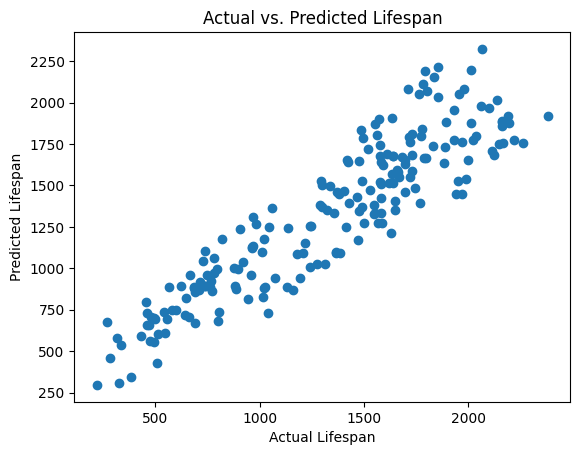

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = "/content/COMP1801_CourseworkDataset1_tabular (1).csv"  # Replace with the actual path
df = pd.read_csv(file_path)

# Assuming 'Lifespan' is your dependent variable, and other columns are features
X = df.drop('Lifespan', axis=1)
y = df['Lifespan']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = ['partType', 'microstructure', 'seedLocation', 'castType']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.columns.difference(categorical_cols)),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline with preprocessing and linear regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Lifespan")
plt.ylabel("Predicted Lifespan")
plt.title("Actual vs. Predicted Lifespan")
plt.show()
